In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC #LinearSVC should scale better to a higher number of samples than SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Embedding, SimpleRNN, LSTM, SpatialDropout1D, Flatten, Conv1D, MaxPooling1D, GlobalMaxPooling1D, GlobalAveragePooling1D, Bidirectional,GRU,Input, Dense, Activation, RepeatVector, Dropout, Concatenate

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            # logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            # print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print("Error: ",e)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model

from transformers import BertTokenizer, TFBertModel
from transformers import RobertaTokenizer, TFRobertaModel
from transformers import XLNetTokenizer, TFXLNetModel

from scipy.stats import pearsonr

from langdetect import detect
import langid

pd.set_option('display.max_colwidth', 50)

In [2]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [3]:
df = pd.read_csv("Final_Dataset_English.csv")

In [4]:
check(df)

column  dtypes  nunique  sum_null
0   text  object   141092         0
1  label   int64        2         0

In [5]:
df.head()

text  label
0  Donald Trump just couldn t wish all Americans ...      0
1  House Intelligence Committee Chairman Devin Nu...      0
2  On Friday, it was revealed that former Milwauk...      0
3  On Christmas day, Donald Trump announced that ...      0
4  Pope Francis used his annual Christmas Day mes...      0

In [6]:
stop_words = set(stopwords.words('english'))
#df['title'] = df['title'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [7]:
df['text'] = df['text'].apply(lambda x: re.sub('[^a-zA-Z0-9\s]', '', x))
df['text'] = df['text'].apply(lambda x: x.lower())

Text(0.5, 1.0, '15 Most Common Words in Fake News')

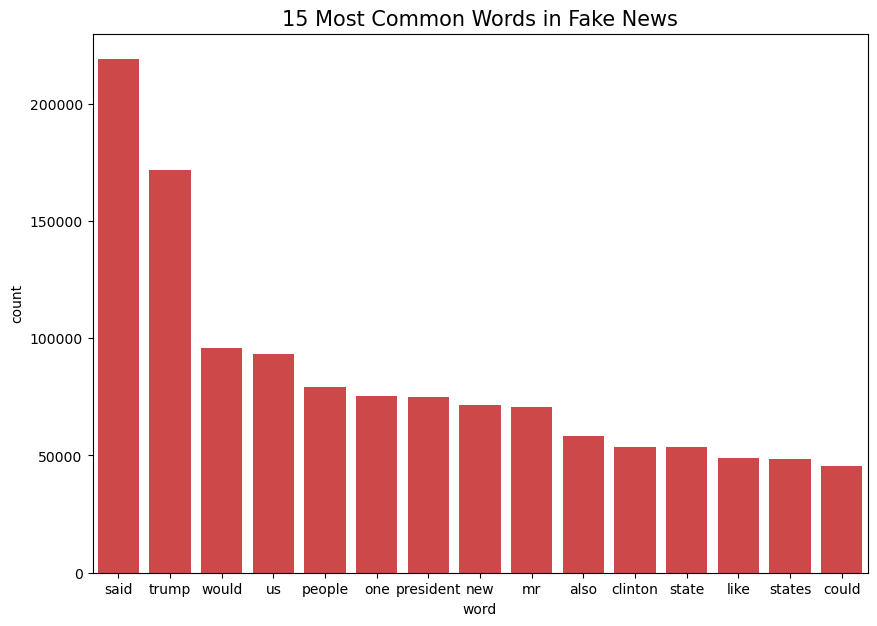

In [ ]:
import collections

#get word collections for real/fake news
fake_news_words = collections.Counter([word for sentence in df.loc[df['label'] == 0]['text'] for word in sentence.split()])

df_mc_fake = pd.DataFrame(columns = ['word','count'], data=(fake_news_words.most_common(15)))

fig, axes = plt.subplots(1,1,figsize = (10, 7))

sns.barplot(data = df_mc_fake, x= 'word', y = 'count', color = '#dd0000', alpha = 0.8, ax = axes)
axes.set_title('15 Most Common Words in Fake News',  fontsize=15)


Text(0.5, 1.0, '15 Most Common Words in Real News')

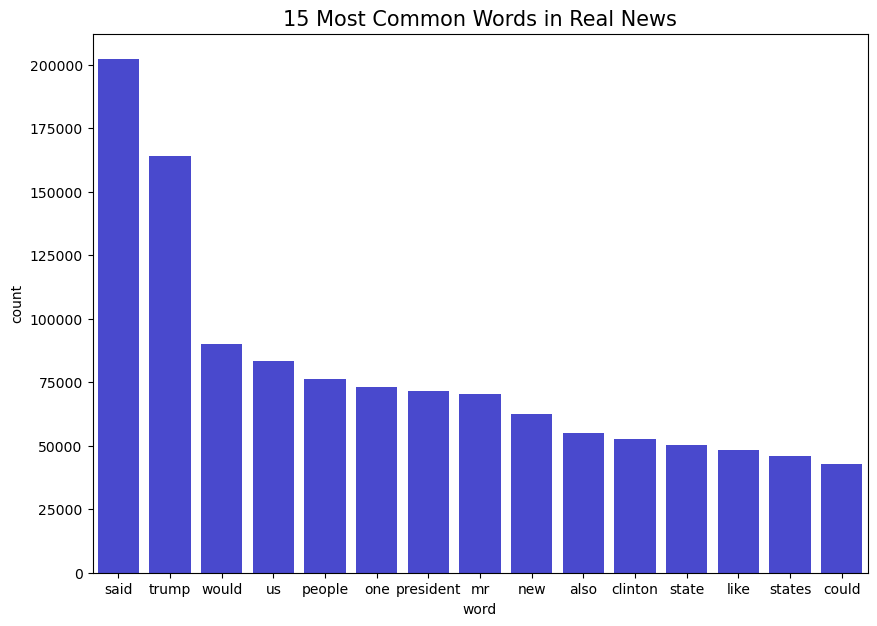

In [ ]:
real_news_words = collections.Counter([word for sentence in df.loc[df['label'] == 1]['text'] for word in sentence.split()])

df_mc_real = pd.DataFrame(columns = ['word','count'], data=(real_news_words.most_common(15)))

fig, axes = plt.subplots(1,1,figsize = (10, 7))

sns.barplot(data = df_mc_real, x= 'word', y = 'count', color = '#0000dd', alpha = 0.8, ax = axes)
axes.set_title('15 Most Common Words in Real News',  fontsize=15)

500 most common words in the English dataset


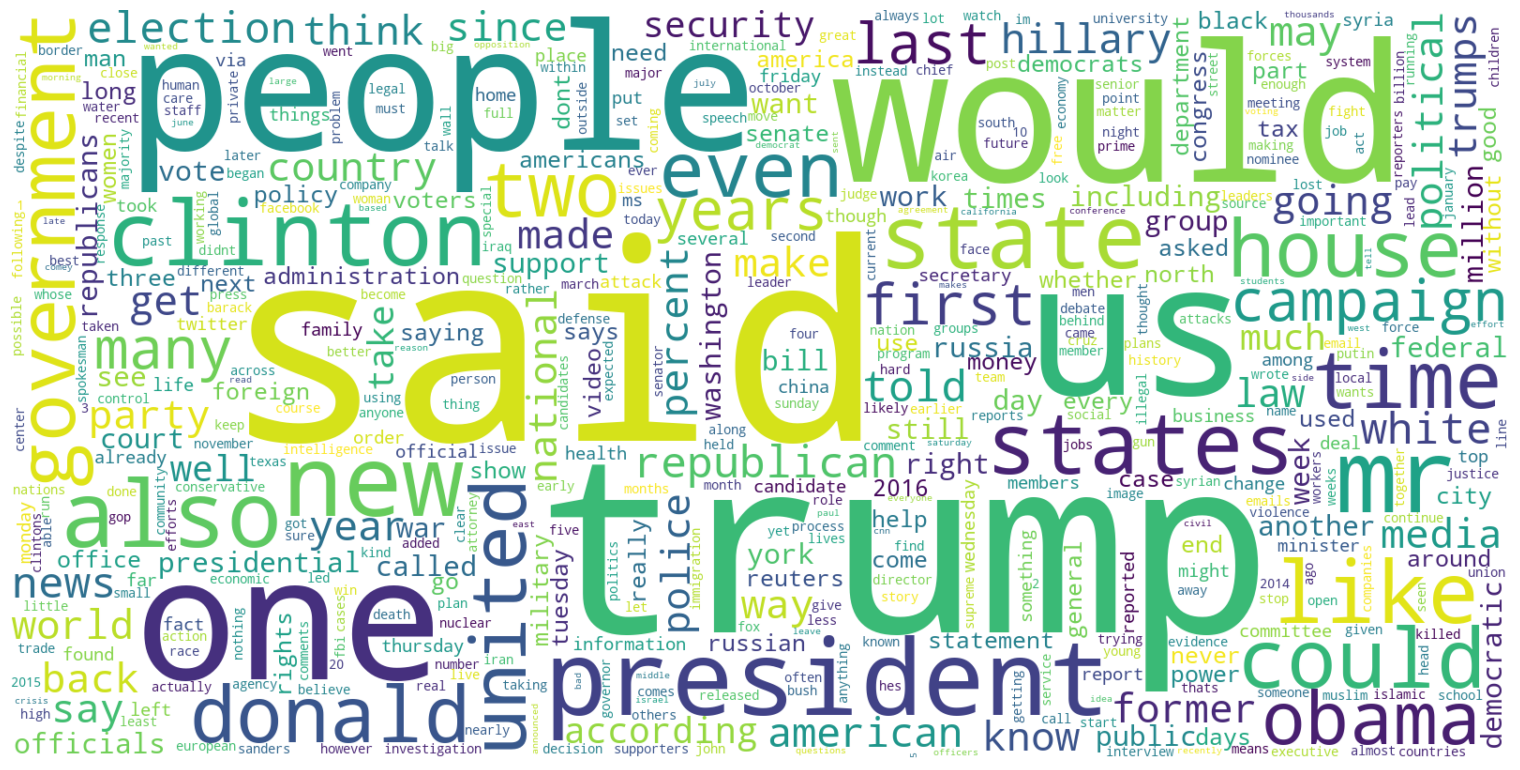

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample dataset (replace with your actual data)
all_text = ' '.join(df['text'])

# Calculate word frequencies
word_frequencies = collections.Counter(all_text.split())

# Generate the word cloud using the most common words
wordcloud = WordCloud(width=1600, height=800, background_color='white', max_words=500).generate_from_frequencies(word_frequencies)

# Plot the word cloud
print("500 most common words in the English dataset")
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and labels
plt.tight_layout(pad=0)
plt.show()

500 most common words in English fake news


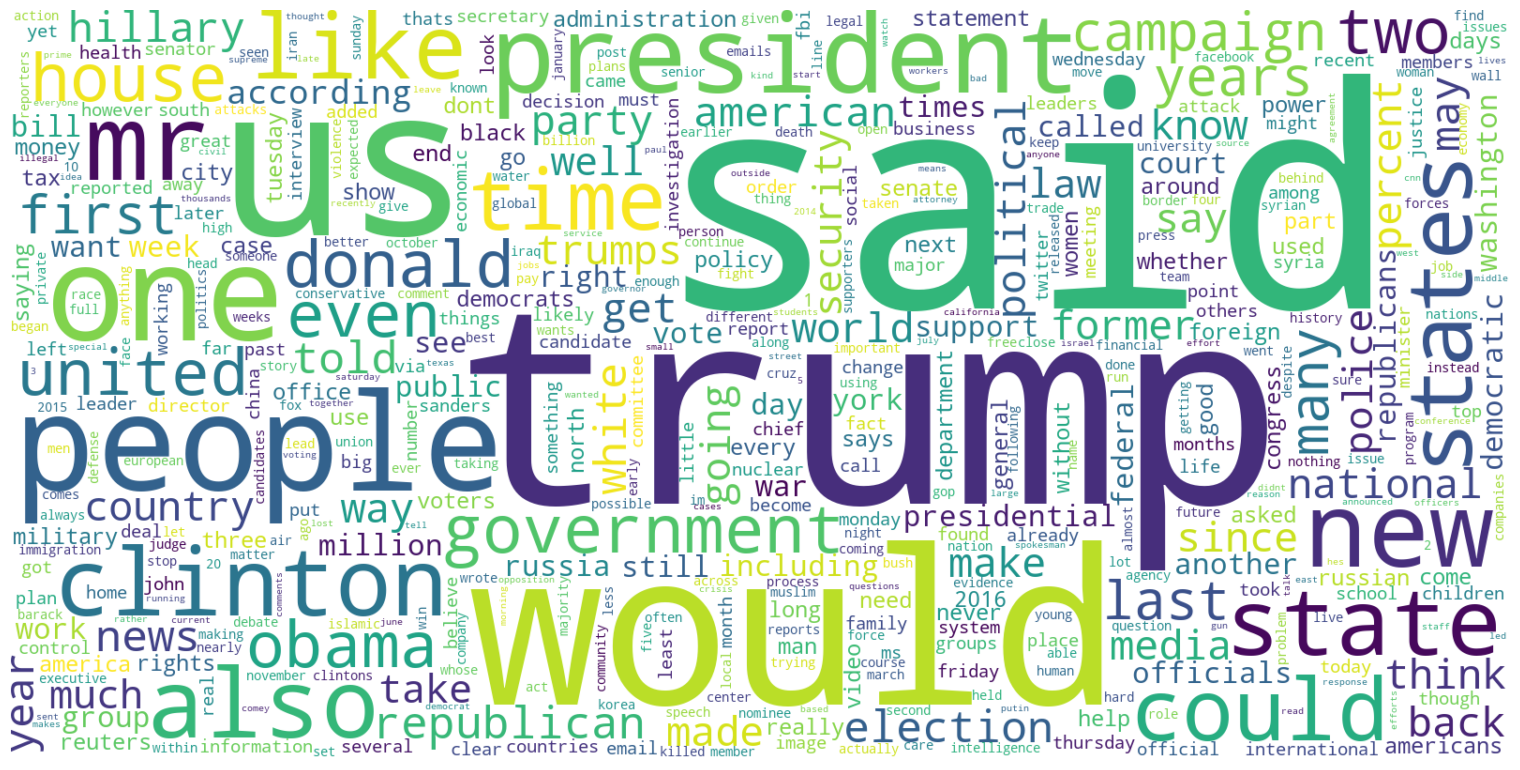

In [ ]:
# Sample dataset (replace with your actual data)
fake_text = ' '.join(df.loc[df['label'] == 0]['text'])  # Concatenate fake texts

# Calculate word frequencies for fake texts
fake_word_frequencies = collections.Counter(fake_text.split())

# Generate the word cloud using the most common words
wordcloud = WordCloud(width=1600, height=800, background_color='white', max_words=500).generate_from_frequencies(word_frequencies)

# Plot the word cloud
print("500 most common words in English fake news")
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and labels
plt.tight_layout(pad=0)
plt.show()

500 most common words in English real news


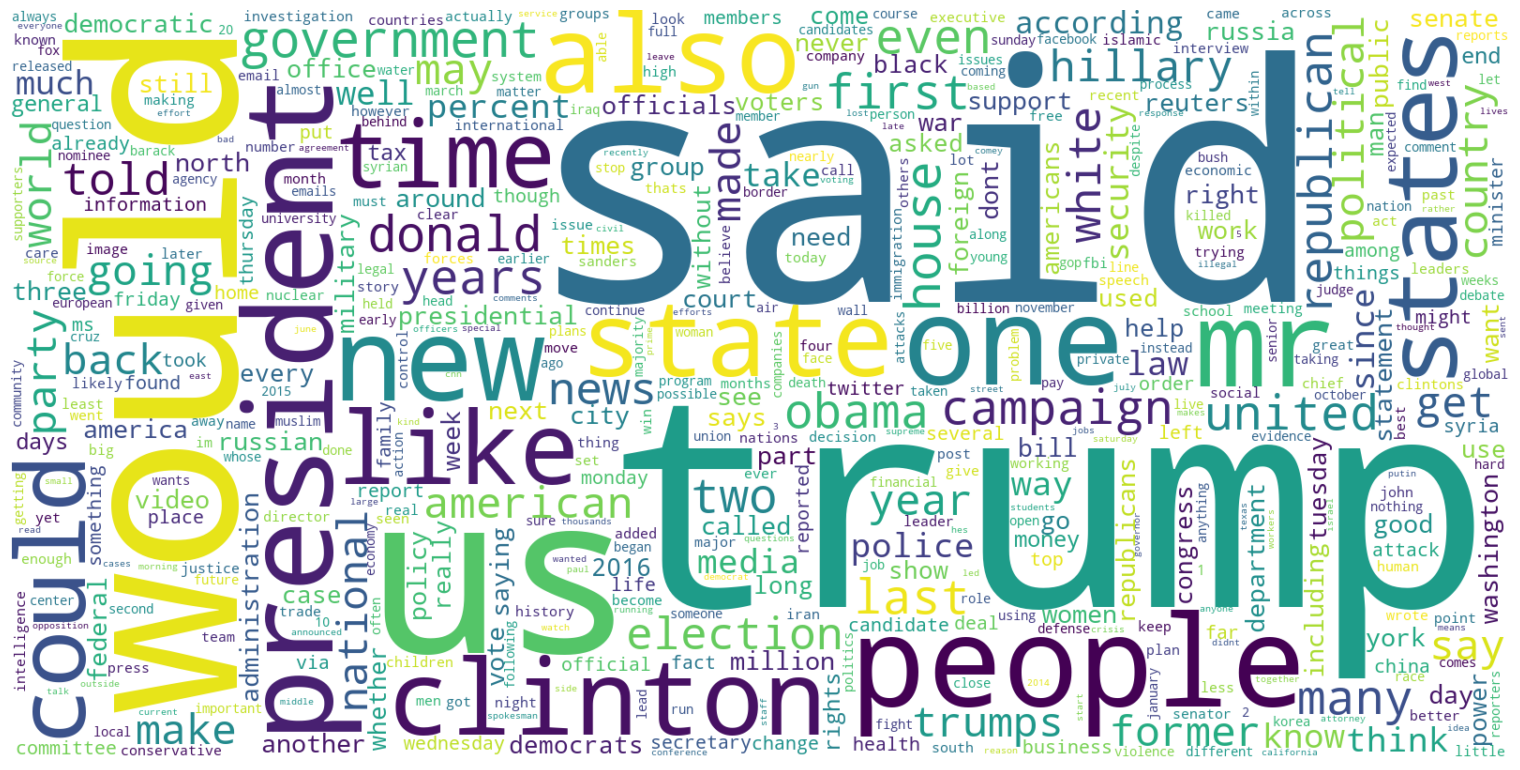

In [ ]:
# Sample dataset (replace with your actual data)
fake_text = ' '.join(df.loc[df['label'] == 1]['text'])  # Concatenate fake texts

# Calculate word frequencies for fake texts
fake_word_frequencies = collections.Counter(fake_text.split())

# Generate the word cloud using the most common words
wordcloud = WordCloud(width=1600, height=800, background_color='white', max_words=500).generate_from_frequencies(word_frequencies)

# Plot the word cloud
print("500 most common words in English real news")
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and labels
plt.tight_layout(pad=0)
plt.show()

300 most common bi-grams in English fake news


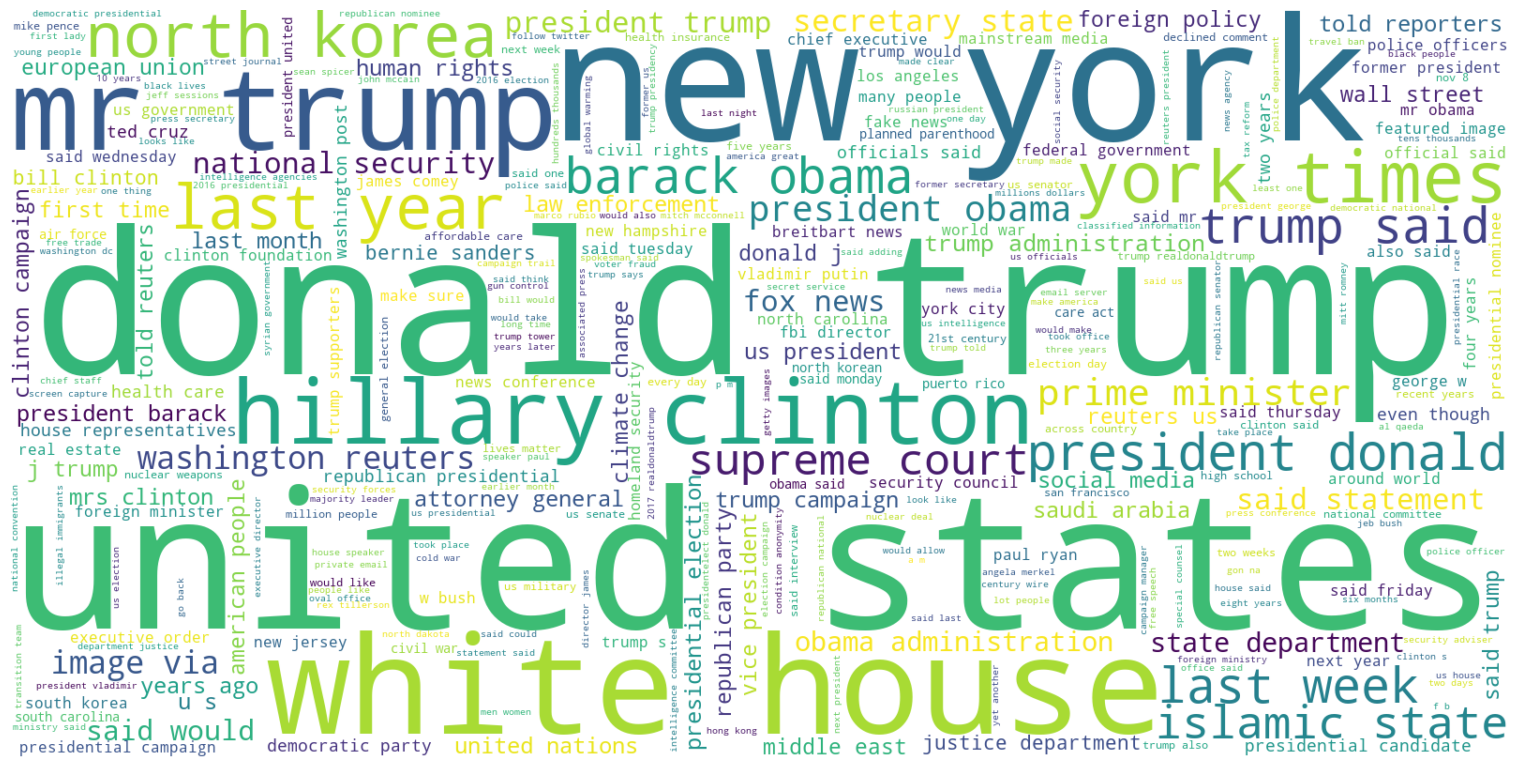

In [14]:
from nltk.util import ngrams
import collections
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample dataset (replace with your actual data)
fake_text = ' '.join(df.loc[df['label'] == 0]['text'])  # Concatenate fake texts

# Tokenize the text into words
words = nltk.word_tokenize(fake_text)

# Create bi-grams from the words
bi_grams = list(ngrams(words, 2))  # Change '2' to the desired n-gram size

# Convert bi-grams back to strings
bi_gram_strings = [' '.join(gram) for gram in bi_grams]

# Calculate bi-gram frequencies
bi_gram_frequencies = collections.Counter(bi_gram_strings)

# Generate the word cloud using the most common bi-grams
wordcloud = WordCloud(width=1600, height=800, background_color='white', max_words=300).generate_from_frequencies(bi_gram_frequencies)

# Plot the word cloud
print("300 most common bi-grams in English fake news")
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and labels
plt.tight_layout(pad=0)
plt.show()

300 most common bi-grams in English real news


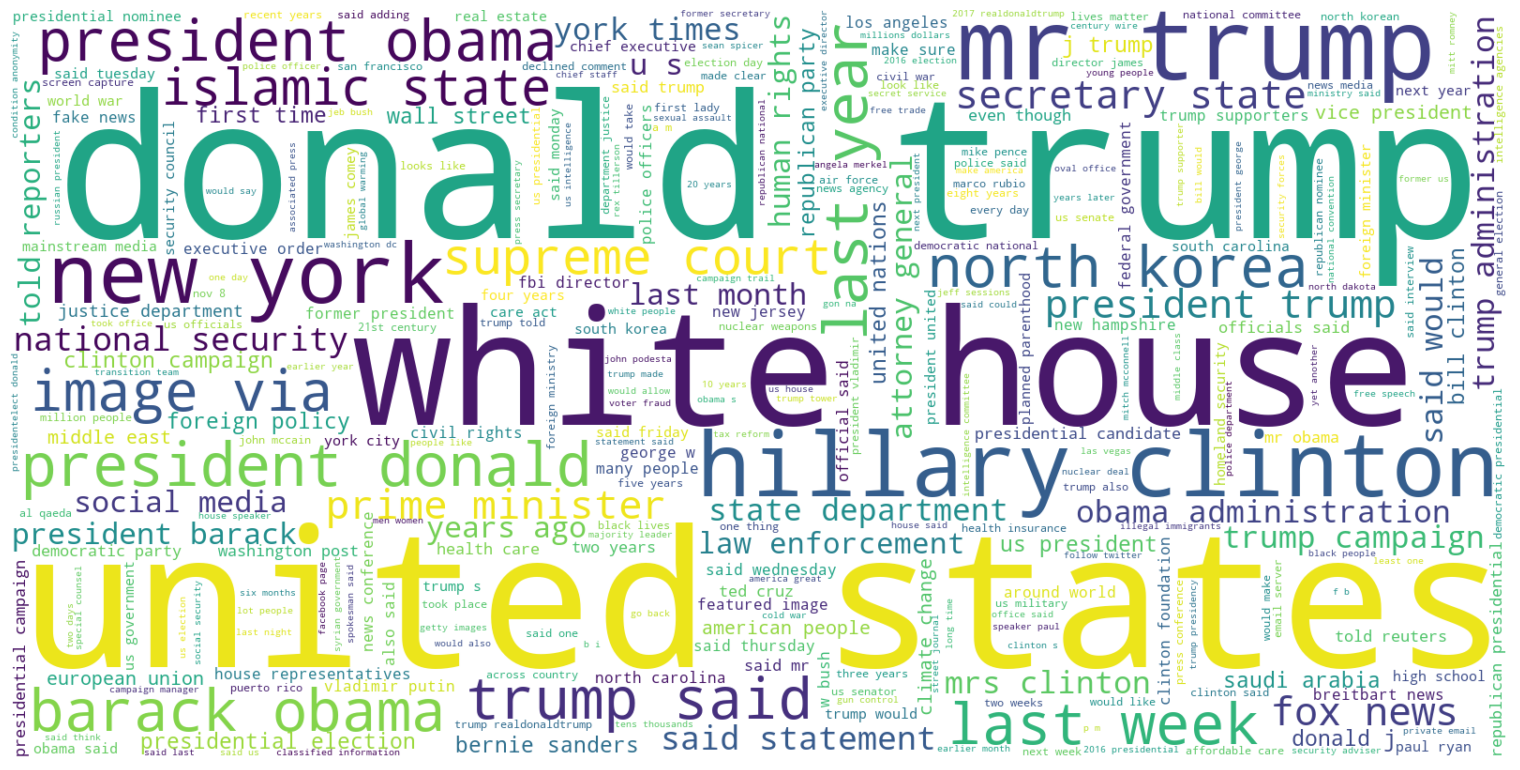

In [15]:
from nltk.util import ngrams

# Sample dataset (replace with your actual data)
fake_text = ' '.join(df.loc[df['label'] == 1]['text'])  # Concatenate fake texts

# Tokenize the text into words
words = nltk.word_tokenize(fake_text)

# Create bi-grams from the words
bi_grams = list(ngrams(words, 2))  # Change '2' to the desired n-gram size

# Convert bi-grams back to strings
bi_gram_strings = [' '.join(gram) for gram in bi_grams]

# Calculate bi-gram frequencies
bi_gram_frequencies = collections.Counter(bi_gram_strings)

# Generate the word cloud using the most common bi-grams
wordcloud = WordCloud(width=1600, height=800, background_color='white', max_words=300).generate_from_frequencies(bi_gram_frequencies)

# Plot the word cloud
print("300 most common bi-grams in English real news")
plt.figure(figsize=(15, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and labels
plt.tight_layout(pad=0)
plt.show()

In [3]:
df = pd.read_csv("Final_dataset_preprocessed_without_mendeley.csv")

In [4]:
df.head()

text  label  \
0  donald trump just couldn t wish all americans ...      0   
1  house intelligence committee chairman devin nu...      0   
2  on friday it was revealed that former milwauke...      0   
3  on christmas day donald trump announced that h...      0   
4  pope francis used his annual christmas day mes...      0   

                                   text_preprocessed  count_sentenc_text  \
0  donald trump wish american happi new year leav...                   1   
1  hous intellig committe chairman devin nune go ...                   1   
2  friday reveal former milwauke sheriff david cl...                   1   
3  christma day donald trump announc would back w...                   1   
4  pope franci use annual christma day messag reb...                   1   

   count_words_text  num_nouns_text  num_verbs_text  num_adj_text  \
0               287             244               9            23   
1               179             148               6            23   
2               339             308               9            13   
3               265             227              14            14   
4               211             181              16             9   

   num_adv_text  sentiment_avg_text  \
0            11              0.9423   
1             2              0.7943   
2             9             -0.9946   
3            10              0.5859   
4             5             -0.2960   

                                            features  
0  donald trump wish american happi new year leav...  
1  hous intellig committe chairman devin nune go ...  
2  friday reveal former milwauke sheriff david cl...  
3  christma day donald trump announc would back w...  
4  pope franci use annual christma day messag reb...

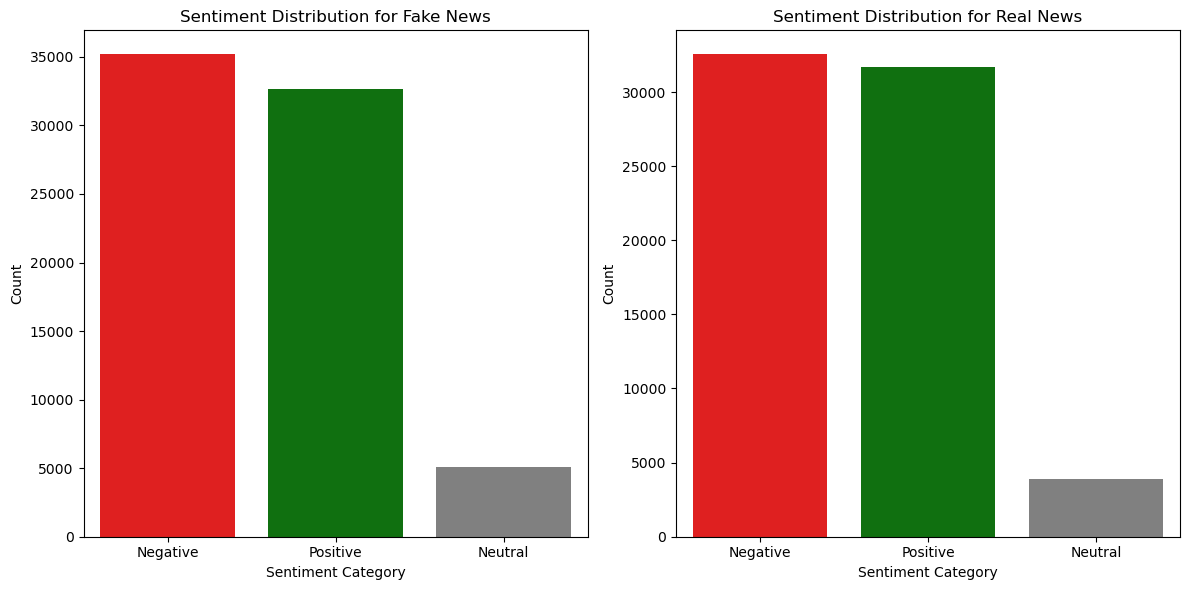

In [22]:
# Define sentiment thresholds
negative_threshold = -0.05
positive_threshold = 0.05

# Function to classify sentiments
def classify_sentiment(score):
    if score <= negative_threshold:
        return 'Negative'
    elif score >= positive_threshold:
        return 'Positive'
    else:
        return 'Neutral'

# Apply sentiment classification to each row
df['sentiment_category'] = df['sentiment_avg_text'].apply(classify_sentiment)

# Create separate DataFrames for real and fake news
real_news_df = df[df['label'] == 1]
fake_news_df = df[df['label'] == 0]

# Count the sentiment distribution for real news
real_sentiment_counts = real_news_df['sentiment_category'].value_counts()

# Count the sentiment distribution for fake news
fake_sentiment_counts = fake_news_df['sentiment_category'].value_counts()

# Define colors for the bars
colors = {'Negative': 'red', 'Neutral': 'gray', 'Positive': 'green'}

# Plot the sentiment distributions for real and fake news with custom colors
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=fake_sentiment_counts.reset_index(), x='index', y='sentiment_category', palette=colors)
plt.title('Sentiment Distribution for Fake News')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(data=real_sentiment_counts.reset_index(), x='index', y='sentiment_category', palette=colors)
plt.title('Sentiment Distribution for Real News')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

plt.tight_layout()
plt.show()